<a href="https://colab.research.google.com/github/Yatinkhunt/Ecommerce/blob/master/CUSTOMER_CHURN_PREDICTION_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Overview:

The Customer Churn Prediction and Sales Dashboard project leverages Data Analytics
and Machine Learning to analyze customer behavior, predict churn probability, and
visualize sales trends. This system is essential for businesses, e-commerce platforms, and
service providers to enhance customer retention and optimize sales strategies.

In [ ]:
# Importing the library which is useful for customer churn predictions.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

#### Dataset Loadong And Basic Understanding.

In [ ]:
df_cc = pd.read_excel("C:/Users/Yatin/Desktop/ZIDIO/Zidio_Project_3/Telco_customer_churn.xlsx", sheet_name = "Telco_Churn")

In [ ]:
# Describe the shape of the dataset of customer churn.

df_cc.shape

(7043, 33)

In [ ]:
# Display the first 5 rows of the dataset.

df_cc.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [ ]:
# Display the columns name.

df_cc.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
# Display the information of the dataset.

df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
# Display the summary and statistics of the dataset.

df_cc.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


#### Dataset Cleaning And Processing.

In [ ]:
# Checking the null values in the dataset...........

df_cc.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
# Replace blank spaces with NaN
df_cc = df_cc.replace(" ", np.nan)

In [ ]:
# Drop rows with missing target (if any)

df_cc.dropna(subset=['Churn Label'], inplace=True)

In [ ]:
# Convert Total Charges to numeric if needed

if df_cc['Total Charges'].dtype == 'O':
    df_cc['Total Charges'] = pd.to_numeric(df_cc['Total Charges'], errors='coerce')

In [ ]:
# Fill numeric NaN with median

df_cc['Total Charges'].fillna(df_cc['Total Charges'].median(), inplace=True)

In [ ]:
# Drop unnecessary columns (like customerID, lat long, etc.)

drop_cols = ['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
             'Lat Long', 'Latitude', 'Longitude', 'Churn Reason']
df_cc = df_cc.drop(columns=[c for c in drop_cols if c in df_cc.columns])

print("After cleaning:", df_cc.shape)

After cleaning: (7043, 24)


In [ ]:
# Checking null values

df_cc.isnull().sum()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [ ]:
# Encode Categorical Variables

df_cc = pd.get_dummies(df_cc, drop_first=True)
print("After encoding:", df_cc.shape)

After encoding: (7043, 7076)


In [ ]:
# Split Features and Target

# Find churn target column automatically

target_col = [col for col in df_cc.columns if 'Churn Label' in col]
print("Detected target column:", target_col)

if not target_col:
    raise KeyError("'Churn Label' column not found after encoding.")

y = df_cc[target_col[0]]
X = df_cc.drop(target_col, axis=1)

Detected target column: ['Churn Label_Yes']


In [ ]:
 # Train-Test Split (Split the dataset into training part and testing part)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (5634, 7075)  Test shape: (1409, 7075)


In [ ]:
# Scale Numeric Columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(df_cc.columns)

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'CustomerID_0003-MKNFE', 'CustomerID_0004-TLHLJ',
       'CustomerID_0011-IGKFF', 'CustomerID_0013-EXCHZ',
       ...
       'Streaming TV_Yes', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check',
       'Churn Label_Yes'],
      dtype='object', length=7076)


#### EDA - Exploratory Data Analysis.

##### Churn Distribution Countplot :

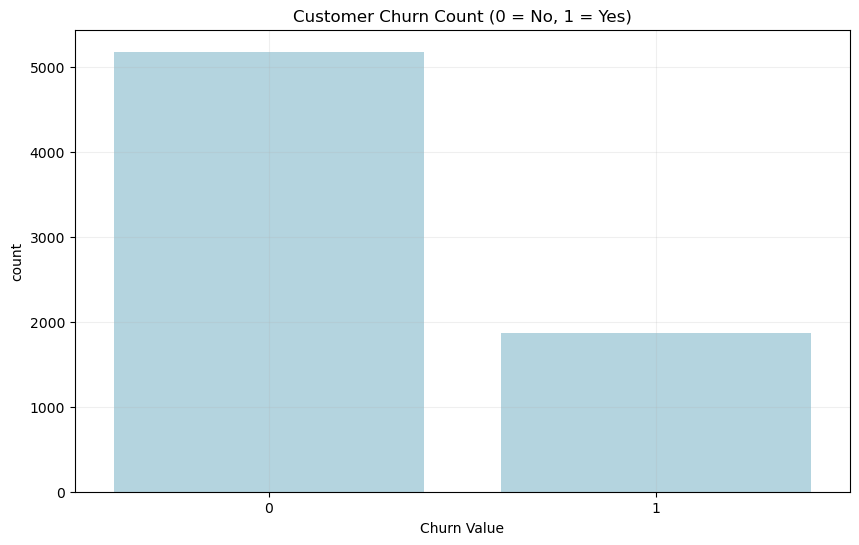

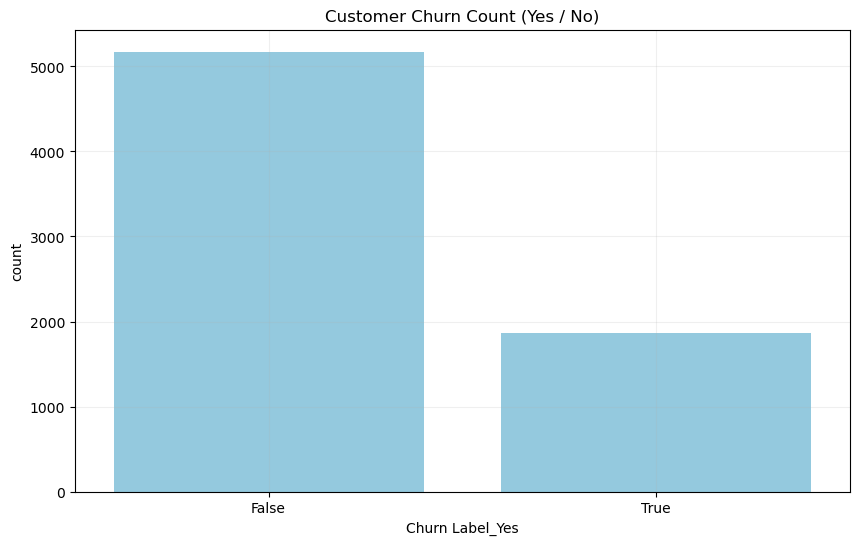

In [ ]:
# Using numeric churn column
plt.figure(figsize = (10,6))
sns.countplot(x = 'Churn Value', data = df_cc, color = "lightblue")
plt.title("Customer Churn Count (0 = No, 1 = Yes)")
plt.grid(True, alpha = 0.2)
plt.show()

# Using label
plt.figure(figsize = (10,6))
sns.countplot(x = 'Churn Label_Yes', data = df_cc, color = "skyblue")
plt.title("Customer Churn Count (Yes / No)")
plt.grid(True, alpha = 0.2)
plt.show()

##### Correlaion Heatmap :

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')


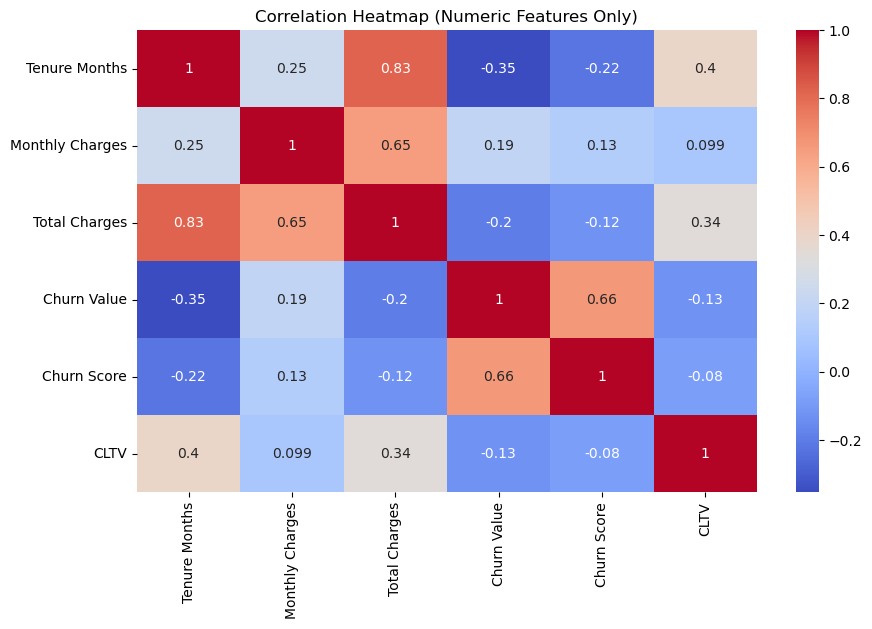

In [ ]:
# Select Only Numeric Columns:
numeric_cols = df_cc.select_dtypes(include = "number")
print(numeric_cols.columns)

# Heatmap on numeric columns only.
plt.figure(figsize = (10,6))
sns.heatmap(numeric_cols.corr(), annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

##### Visualizing Features VS Churn :

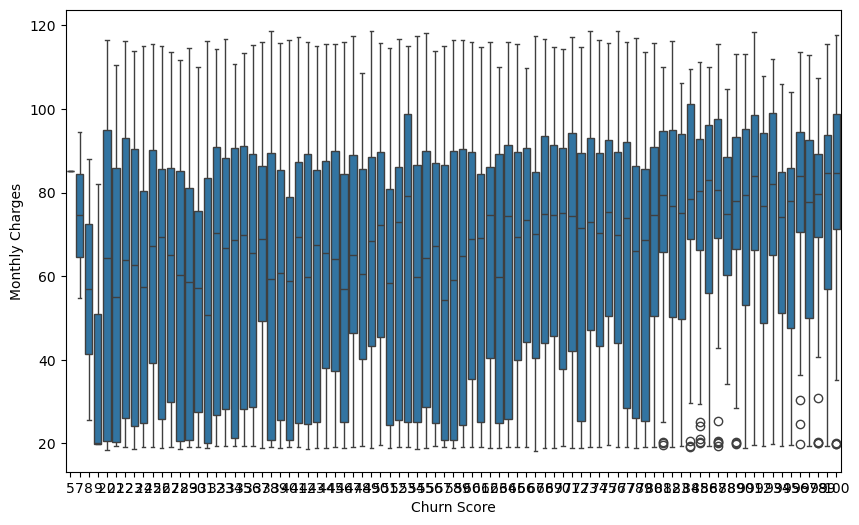

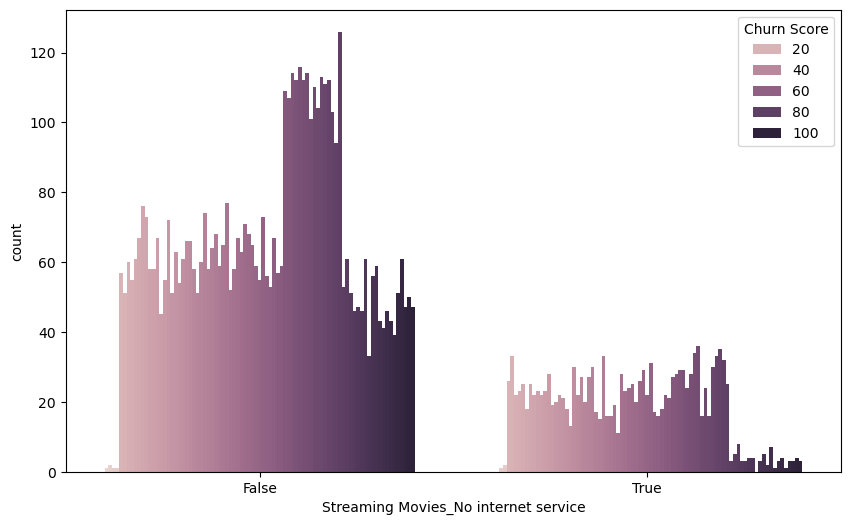

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Churn Score', y='Monthly Charges', data = df_cc)
plt.show()

plt.figure(figsize = (10,6))
sns.countplot(x='Streaming Movies_No internet service', hue='Churn Score', data = df_cc)
plt.show()

##### Churn By Values Type :

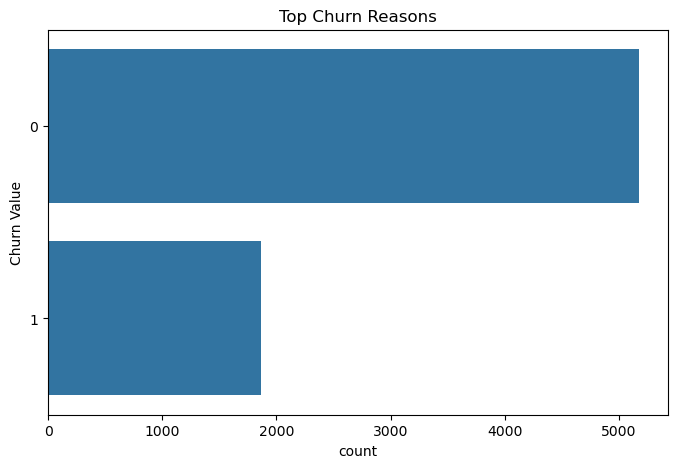

In [ ]:
# Only for EDA, not ML model
plt.figure(figsize=(8,5))
sns.countplot(y='Churn Value', data=df_cc)
plt.title('Top Churn Reasons')
plt.show()

### Model Building :

#### 1. Logistic Regression :

In [ ]:
# Create and Fit The Model

log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)

# Evaluation
print("Logistic Regression Results : ")
print("\n Accuracy Score Of Logistic Regression : ", accuracy_score(y_test, y_pred_lr))
print("\n Confusion Matrix Of Logistic Regression : \n ", confusion_matrix(y_test, y_pred_lr))
print("\n Classfication Report Of Logistic Regression : \n ", classification_report(y_test, y_pred_lr))

Logistic Regression Results : 

 Accuracy Score Of Logistic Regression :  0.9921930447125621

 Confusion Matrix Of Logistic Regression : 
  [[1035    0]
 [  11  363]]

 Classfication Report Of Logistic Regression : 
                precision    recall  f1-score   support

       False       0.99      1.00      0.99      1035
        True       1.00      0.97      0.99       374

    accuracy                           0.99      1409
   macro avg       0.99      0.99      0.99      1409
weighted avg       0.99      0.99      0.99      1409



#### 2. Decision Tree :

In [ ]:
# Create and fit the model
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

# Prediction
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Results : ")
print("Accuracy Score Of Decision Tree : ", accuracy_score(y_test, y_pred_dt))
print("\n Confusion Matrix Of Decision Tree : \n ", confusion_matrix(y_test, y_pred_dt))
print("\n Classfication Report Of Decision Tree : \n ", classification_report(y_test, y_pred_dt))

Decision Tree Results : 
Accuracy Score Of Decision Tree :  1.0

 Confusion Matrix Of Decision Tree : 
  [[1035    0]
 [   0  374]]

 Classfication Report Of Decision Tree : 
                precision    recall  f1-score   support

       False       1.00      1.00      1.00      1035
        True       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



#### 3. Random Forest :

In [ ]:
# Create and Train Model
rf = RandomForestClassifier(
    n_estimators = 200,   # Numbers Of Trees
    max_depth = None,
    random_state = 42
)

rf.fit(X_train, y_train)

# Prediction
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Results Of Random Forests : ")
print("\n Accuracy Score Of Random Forest : \n ", accuracy_score(y_test, y_pred_rf))
print("\n Confusion Matrix Of Random Forest : \n" , confusion_matrix(y_test, y_pred_rf))
print("\n Classfication Report Of Random Forest : \n ", classification_report(y_test, y_pred_rf))

Results Of Random Forests : 

 Accuracy Score Of Random Forest : 
  0.9943222143364088

 Confusion Matrix Of Random Forest : 
 [[1035    0]
 [   8  366]]

 Classfication Report Of Random Forest : 
                precision    recall  f1-score   support

       False       0.99      1.00      1.00      1035
        True       1.00      0.98      0.99       374

    accuracy                           0.99      1409
   macro avg       1.00      0.99      0.99      1409
weighted avg       0.99      0.99      0.99      1409



#### 4. XGBoost :

In [ ]:
# Create and Train a Model
xgb = XGBClassifier(
    eval_metric = "logloss",
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 6,
    random_state = 42
)

xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("Result Of XGBoost : ")
print("Accuracy Score Of XGBoost : \n ", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix Of XGBoost : \n ", confusion_matrix(y_test, y_pred_xgb))
print("Classificaion Report Of XGBoost : \n ", classification_report(y_test, y_pred_xgb))

Result Of XGBoost : 
Accuracy Score Of XGBoost : 
  1.0
Confusion Matrix Of XGBoost : 
  [[1035    0]
 [   0  374]]
Classificaion Report Of XGBoost : 
                precision    recall  f1-score   support

       False       1.00      1.00      1.00      1035
        True       1.00      1.00      1.00       374

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



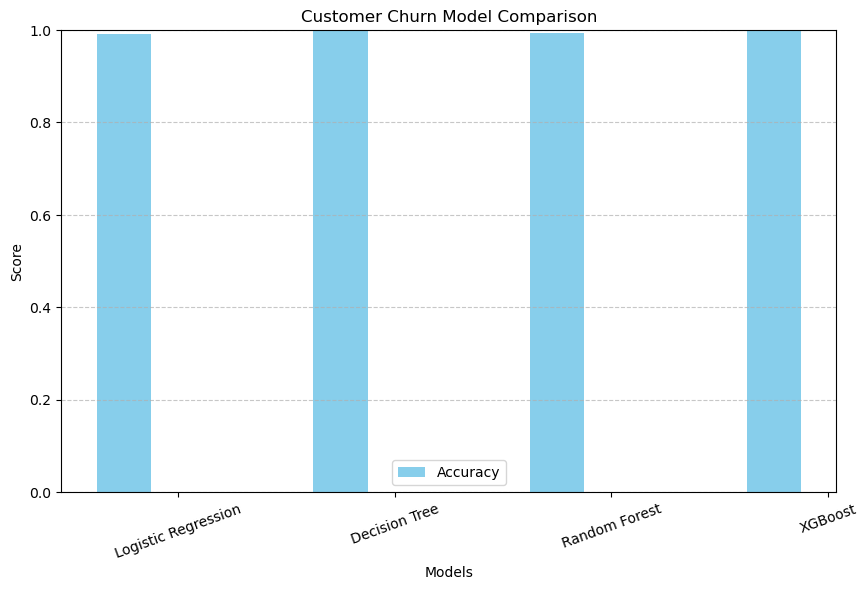

In [ ]:
# Calculate metrics
# ----------------------
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
}

df_metrics = pd.DataFrame(metrics)

# ----------------------
# Plot grouped bar chart
# ----------------------
import numpy as np

x = np.arange(len(df_metrics['Model']))  # label locations
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width, df_metrics['Accuracy'], width, label='Accuracy', color='skyblue')

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Customer Churn Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(df_metrics['Model'], rotation=20)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


## Deep Learning Models :

#### 1. Artificial Neaural Network :

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7842 - loss: 0.4522 - val_accuracy: 0.7346 - val_loss: 1.1735
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9544 - loss: 0.1183 - val_accuracy: 0.8474 - val_loss: 0.3005
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9961 - loss: 0.0140 - val_accuracy: 0.8722 - val_loss: 0.2762
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 0.8808 - val_loss: 0.2783
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.8779 - val_loss: 0.3125
Epoch 6/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9049 - val_loss: 0.2507
Epoch 7/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 1.0000 - loss: 4.2419e-04 - val_accuracy: 0.8786 - val_loss: 0.3381
Epoch 8/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9998 - loss: 6.0448e-04 - 

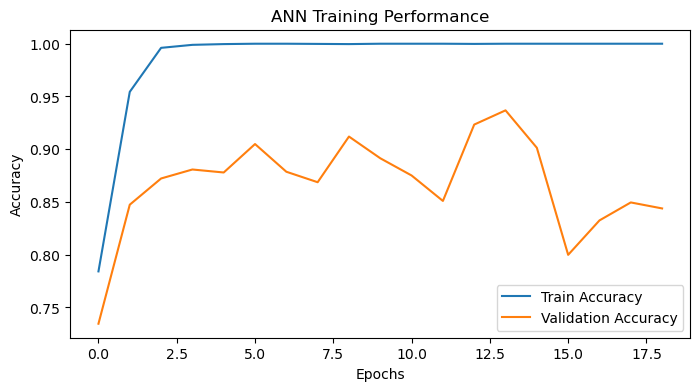

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


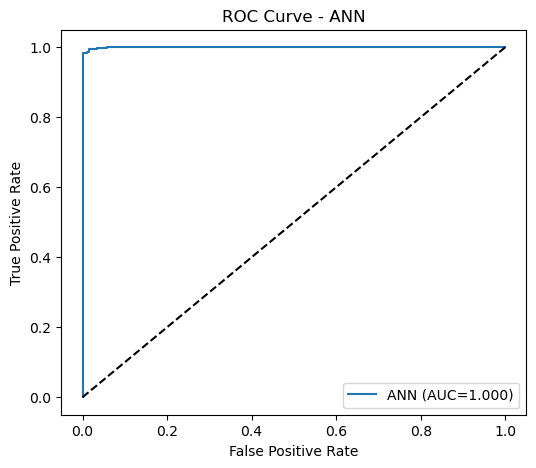

In [ ]:
#  ANN Model for Customer Churn Prediction

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Build ANN
ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # binary output
])

# Compile ANN
ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = ann.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
ann_eval = ann.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ ANN Test Accuracy: {ann_eval[1]:.4f}")

# Plot Training History
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ROC & AUC
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = ann.predict(X_test).ravel()
auc_ann = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ANN (AUC={auc_ann:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ANN')
plt.legend()
plt.show()

#### 2. Recurrent Neural Network :

RNN Training shape: (5632, 3, 7075)
RNN Testing shape: (1408, 3, 7075)
Epoch 1/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6536 - loss: 0.6511 - val_accuracy: 0.9879 - val_loss: 0.4322
Epoch 2/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6685 - loss: 0.6225 - val_accuracy: 0.9311 - val_loss: 0.4428
Epoch 3/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.6763 - loss: 0.6200 - val_accuracy: 1.0000 - val_loss: 0.2925
Epoch 4/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6880 - loss: 0.6085 - val_accuracy: 0.8651 - val_loss: 0.3380
Epoch 5/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6969 - loss: 0.6032 - val_accuracy: 1.0000 - val_loss: 0.3255
Epoch 6/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.6930 - loss: 0.6048 - val_accuracy: 1.0000 - val_loss: 0.3400
Epoch 7/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7102 - loss: 0.5905 - val_accuracy: 1.0000 - val_loss: 0.3152
Epoch 8/30
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s

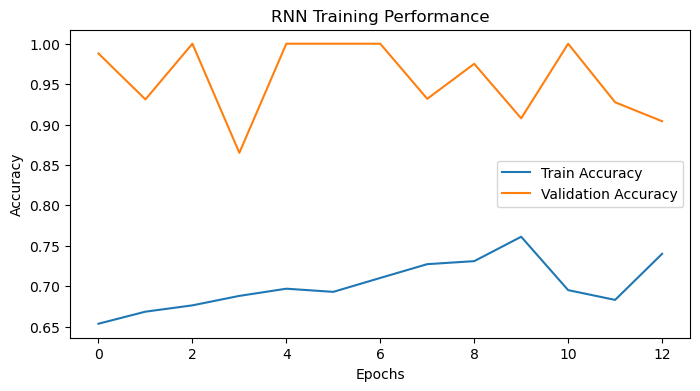

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


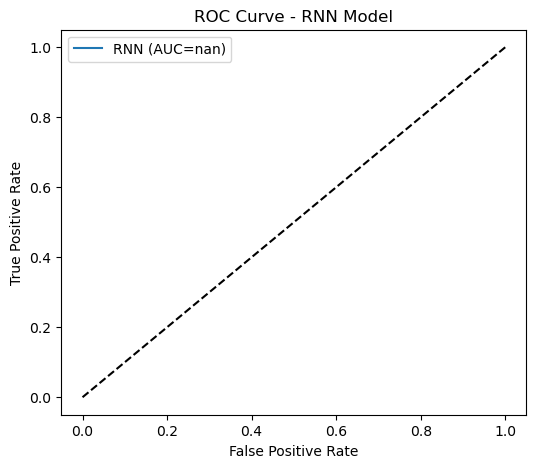

In [ ]:
# Recurrent Neural Network (RNN) Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Prepare Sequential Input Data
# We'll simulate simple sequences based on customer tenure

seq_length = 3  # small pseudo sequence

def create_sequence_data(X, y, seq_len=3):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

# Convert to numeric type
X_np = np.array(X, dtype=np.float32)
y_np = np.array(y, dtype=np.float32)

# Create pseudo-sequence data
X_seq, y_seq = create_sequence_data(X_np, y_np, seq_length)

# Split again for training/testing
split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]

print("RNN Training shape:", X_train_seq.shape)
print("RNN Testing shape:", X_test_seq.shape)

# Build RNN Model
rnn = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile RNN
rnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train RNN
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_rnn = rnn.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

#  Evaluate Performance
rnn_eval = rnn.evaluate(X_test_seq, y_test_seq, verbose=0)
print(f"\n✅ RNN Test Accuracy: {rnn_eval[1]:.4f}")

# Plot Training History
plt.figure(figsize=(8,4))
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ROC Curve for RNN
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob_rnn = rnn.predict(X_test_seq).ravel()
auc_rnn = roc_auc_score(y_test_seq, y_pred_prob_rnn)
fpr, tpr, _ = roc_curve(y_test_seq, y_pred_prob_rnn)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'RNN (AUC={auc_rnn:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RNN Model')
plt.legend()
plt.show()

#### Sales Trends Analysis :

In [ ]:
import pandas as pd
import numpy as np

# Suppose you have 1000 customers
customer_ids = range(1, 1001)

# Generate random transactions for 12 months
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
transaction_new = pd.DataFrame({
    'customer_id': np.random.choice(customer_ids, size=5000),
    'date': np.random.choice(dates, size=5000),
    'amount': np.random.randint(50, 500, size=5000)
})

transaction_new.head()


,customer_id,date,amount
0,250,2024-06-11,328
1,392,2024-03-14,290
2,142,2024-07-17,140
3,666,2024-07-25,451
4,87,2024-02-15,297


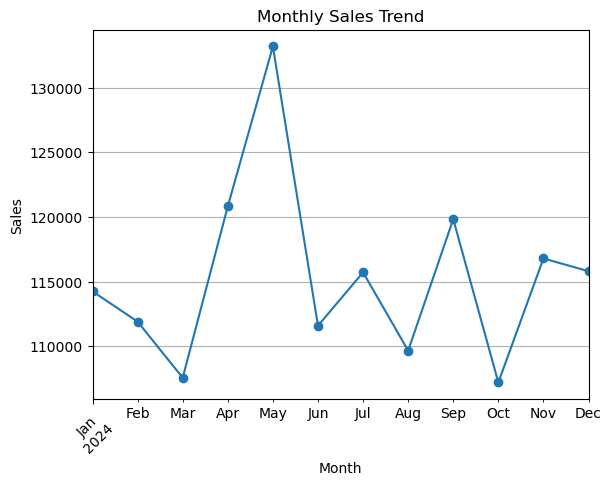

In [ ]:
# Make sure 'date' column is in datetime format
transaction_new['date'] = pd.to_datetime(transaction_new['date'])

# Extract month from date
transaction_new['month'] = transaction_new['date'].dt.to_period('M')

# Group by month and sum the sales
monthly_sales = transaction_new.groupby('month')['amount'].sum()

# Plot monthly sales trend
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', marker='o')  # Added marker for clarity
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
